In [241]:
import pandas as pd
import numpy as np

In [243]:
df = pd.read_csv("D:/Downloads/spaceship-titanic/train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [247]:
data = df.copy()

In [249]:
print("Number of null Values:\n",data.isnull().sum())

Number of null Values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [250]:
print(data.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [253]:
print("No of columns:",len(data.columns))

No of columns: 14


In [255]:
print("Number of duplicate Values:",data.duplicated().sum())

Number of duplicate Values: 0


In [257]:
data = data.drop(['PassengerId','Name','Cabin'],axis = 1)

In [265]:
def missing_values(data):
    for column in data.select_dtypes(include = 'object').columns:
        data[column] = data[column].fillna(data[column].mode()[0])
    for column in data.select_dtypes(include = 'number').columns:
        data[column] = data[column].fillna(data[column].mean())
ms = missing_values(data)

In [267]:
print("MIssing values after handling:\n",data.isnull().sum())

MIssing values after handling:
 HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(2)
memory usage: 568.9+ KB


In [271]:
data.nunique()

HomePlanet         3
CryoSleep          2
Destination        3
Age               81
VIP                2
RoomService     1274
FoodCourt       1508
ShoppingMall    1116
Spa             1328
VRDeck          1307
Transported        2
dtype: int64

In [273]:
from sklearn.preprocessing import LabelEncoder

In [275]:
def type_cast(data,is_train = True):
    encoders = {}
    for column in data.select_dtypes(include = 'float').columns:
        data[column] = data[column].astype('int64')
    for column in data.select_dtypes(include = ['object','bool']).columns:
        le = LabelEncoder()
        if is_train:
            data[column] = le.fit_transform(data[column])
            encoders[column] = le
        else:
            if column in encoders:
                data[column] = encoders.transform(data[column])
            else:
                data[column] = -1
    if is_train:
        joblib.dump(encoders,'encoders.pkl')
    return data

tc = type_cast(data)                                   

In [277]:
import joblib

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    8693 non-null   int32
 1   CryoSleep     8693 non-null   int64
 2   Destination   8693 non-null   int32
 3   Age           8693 non-null   int64
 4   VIP           8693 non-null   int64
 5   RoomService   8693 non-null   int64
 6   FoodCourt     8693 non-null   int64
 7   ShoppingMall  8693 non-null   int64
 8   Spa           8693 non-null   int64
 9   VRDeck        8693 non-null   int64
 10  Transported   8693 non-null   int64
dtypes: int32(2), int64(9)
memory usage: 679.3 KB


In [281]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39,0,0,0,0,0,0,0
1,0,0,2,24,0,109,9,25,549,44,1
2,1,0,2,58,1,43,3576,0,6715,49,0
3,1,0,2,33,0,0,1283,371,3329,193,0
4,0,0,2,16,0,303,70,151,565,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41,1,0,6819,0,1643,74,0
8689,0,1,1,18,0,0,0,0,0,0,0
8690,0,0,2,26,0,0,0,1872,1,0,1
8691,1,0,0,32,0,0,1049,0,353,3235,0


In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='CryoSleep', ylabel='Transported'>

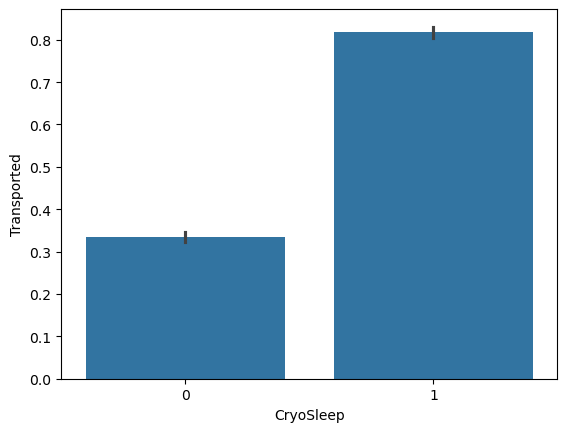

In [285]:
sns.barplot(x = 'CryoSleep',y = 'Transported',data = data)

<Axes: xlabel='Age', ylabel='Count'>

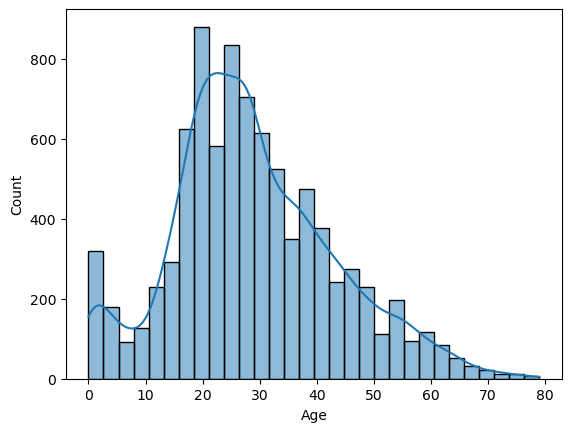

In [286]:
sns.histplot(data['Age'],bins = 30,kde = True)

<Axes: ylabel='Age'>

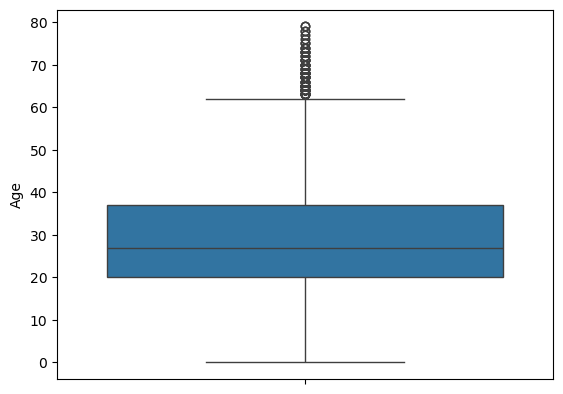

In [288]:
sns.boxplot(data['Age'])

In [291]:
def detect_outliers(data):
    outliers = {}
    for column in data.columns:
        Q1 = np.percentile(data[column],5)
        Q3 = np.percentile(data[column],95)
        IQR = Q3-Q1

        upper_bound = Q3+1.5*IQR
        lower_bound = Q1-1.5*IQR

        colmn_outliers = data[(data[column] < lower_bound ) | (data[column] > upper_bound)]

        if not colmn_outliers.empty:
            outliers[column] = colmn_outliers
            print("Outliers in colmn:",{column})
            print(colmn_outliers[column].values)
            print("Total number of outliers :",len(colmn_outliers))
            print("="*30)
    return outliers
do = detect_outliers(data)

Outliers in colmn: {'VIP'}
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Total number of outliers : 199
Outliers in colmn: {'RoomService'}
[ 7406  4119  3414  5715  5649  3573  3887  3594  8030  4301  8168  3992
  7172  5022  3202  3482  3677  4694  3702  6726  4483  3551  5711  3309
  3865  3471  3340  3361  3537  3478  6498  5493  3559  4102 14327  3148
  4531  3284  4608  8151  3926  5049  3905  4702  3458  9920  4027  5645
  6769  3553  4518  3215  8142  3811  3564  4397  3478  3616  3481  3211
  6103  3839  3358  3332  3191  5959  3580  3591  8209  3651  5888  6256
  3809  4210  8243  3784  5327  5757  4924  3146  6899  3402  85

In [293]:
def cap_outliers(df,columns):
    for column in columns:
        Q1 = np.percentile(data[column],5)
        Q3 = np.percentile(data[column],95)
        IQR = Q3-Q1

        upper_bound = Q3+1.5*IQR
        lower_bound = Q1-1.5*IQR
        df[column] = np.where(df[column] < lower_bound ,lower_bound,df[column])
        df[column] = np.where(df[column] > upper_bound ,upper_bound,df[column])
    return df
columns = ['FoodCourt','Spa','VRDeck','ShoppingMall']
caped = cap_outliers(data,columns)
caped

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39,0,0,0.0,0.0,0.0,0.0,0
1,0,0,2,24,0,109,9.0,25.0,549.0,44.0,1
2,1,0,2,58,1,43,3576.0,0.0,3938.0,49.0,0
3,1,0,2,33,0,0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16,0,303,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41,1,0,6673.5,0.0,1643.0,74.0,0
8689,0,1,1,18,0,0,0.0,0.0,0.0,0.0,0
8690,0,0,2,26,0,0,0.0,1872.0,1.0,0.0,1
8691,1,0,0,32,0,0,1049.0,0.0,353.0,3235.0,0


In [295]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39,0,0,0.0,0.0,0.0,0.0,0
1,0,0,2,24,0,109,9.0,25.0,549.0,44.0,1
2,1,0,2,58,1,43,3576.0,0.0,3938.0,49.0,0
3,1,0,2,33,0,0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16,0,303,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41,1,0,6673.5,0.0,1643.0,74.0,0
8689,0,1,1,18,0,0,0.0,0.0,0.0,0.0,0
8690,0,0,2,26,0,0,0.0,1872.0,1.0,0.0,1
8691,1,0,0,32,0,0,1049.0,0.0,353.0,3235.0,0


In [297]:
def detect_outliers(data):
    outliers = {}
    for column in data.columns:
        Q1 = np.percentile(data[column],5)
        Q3 = np.percentile(data[column],95)
        IQR = Q3-Q1

        upper_bound = Q3+1.5*IQR
        lower_bound = Q1-1.5*IQR

        colmn_outliers = data[(data[column] < lower_bound ) | (data[column] > upper_bound)]

        if not colmn_outliers.empty:
            outliers[column] = colmn_outliers
            print("Outliers in colmn:",{column})
            print(colmn_outliers[column].values)
            print("Total number of outliers :",len(colmn_outliers))
            print("="*30)
    return outliers
do = detect_outliers(data)

Outliers in colmn: {'VIP'}
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Total number of outliers : 199
Outliers in colmn: {'RoomService'}
[ 7406  4119  3414  5715  5649  3573  3887  3594  8030  4301  8168  3992
  7172  5022  3202  3482  3677  4694  3702  6726  4483  3551  5711  3309
  3865  3471  3340  3361  3537  3478  6498  5493  3559  4102 14327  3148
  4531  3284  4608  8151  3926  5049  3905  4702  3458  9920  4027  5645
  6769  3553  4518  3215  8142  3811  3564  4397  3478  3616  3481  3211
  6103  3839  3358  3332  3191  5959  3580  3591  8209  3651  5888  6256
  3809  4210  8243  3784  5327  5757  4924  3146  6899  3402  85

In [307]:
x_train = data.drop('Transported',axis = 1)
y_train = data['Transported']

In [301]:
from sklearn.ensemble import RandomForestClassifier

In [305]:
model = RandomForestClassifier()

In [309]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [346]:
x_test = pd.read_csv("D:/Downloads/spaceship-titanic/test.csv")
x_test = x_test.drop(['PassengerId','Name','Cabin'],axis = 1)

In [348]:
x_test.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [354]:
def missing_values(data):
    for column in data.select_dtypes(include = 'object').columns:
        data[column] = data[column].fillna(data[column].mode()[0])
    for column in data.select_dtypes(include = 'number').columns:
        data[column] = data[column].fillna(data[column].mean())
ms = missing_values(x_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_7212\3498510938.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].fillna(data[column].mode()[0])


In [356]:
x_test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [358]:
def apply_encoders():
    encoders = joblib.load('encoders.pkl')
    return type_cast(x_test,is_train = False)
x_test = apply_encoders()

In [360]:
y_pred = model.predict(x_test)

In [392]:
test_y = pd.read_csv("D:/Downloads/spaceship-titanic/sample_submission.csv")
y_test = test_y['Transported']
passenger_ids = test_y['PassengerId']

In [364]:
from sklearn.metrics import accuracy_score

In [366]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 48.47%


In [400]:
submission = pd.DataFrame({
    'PassengerId': passenger_ids,  
    'Transported': y_pred                  
})
submission['Transported'] = submission['Transported'].replace({0: False, 1: True})
submission.to_csv("D:/Downloads/spaceship-titanic/sample_submission.csv", index=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_7212\1473032117.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  submission['Transported'] = submission['Transported'].replace({0: False, 1: True})
